In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Load news dataset
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

# Standardize column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Display first few rows and column info
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Preview:
   unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-2

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


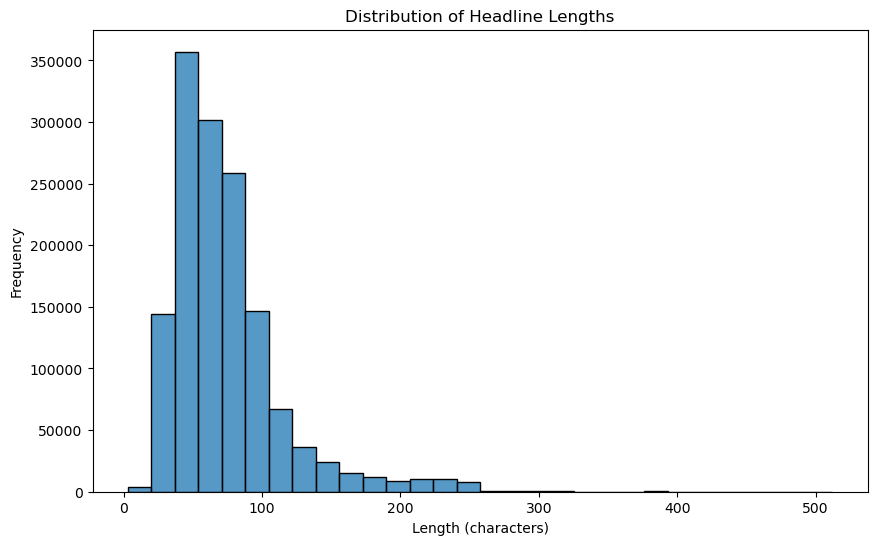

In [4]:
# Calculate headline length (number of characters)
df['headline_length'] = df['headline'].apply(len)

# Display statistics
print("Headline Length Statistics:")
print(df['headline_length'].describe())

# Plot histogram of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.savefig('../notebooks/headline_length_histogram.png')
plt.show()

Top 5 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


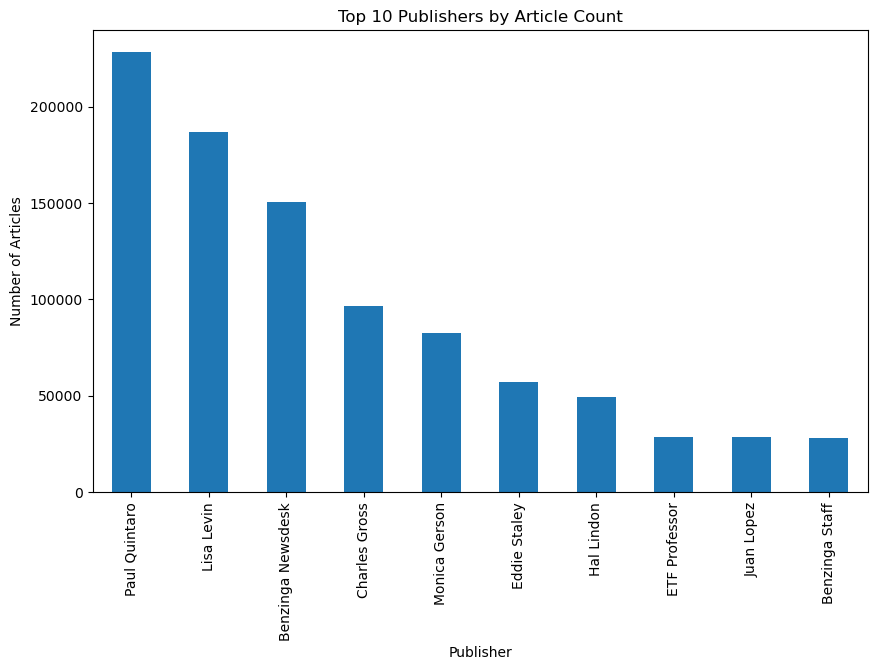

In [6]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print("Top 5 Publishers by Article Count:")
print(publisher_counts.head())

# Plot top 10 publishers
plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.savefig('../notebooks/publisher_counts.png')
plt.show()

Article Counts by Date:
date_only
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2527, dtype: int64


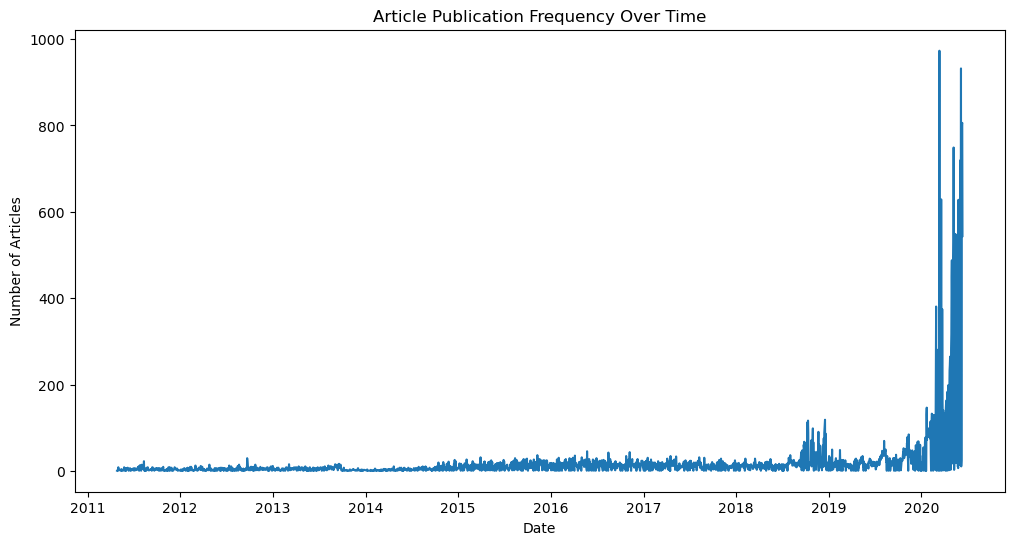

In [12]:
# Convert date column to datetime (UTC-4 timezone)
# Parse date strings (they may already be tz-aware)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# If they are already tz-aware, just convert them to 'America/New_York'
if df['date'].dt.tz is not None:
    df['date'] = df['date'].dt.tz_convert('America/New_York')
else:
    # If tz-naive, localize to UTC first, then convert
    df['date'] = df['date'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')

# Extract date only
df['date_only'] = df['date'].dt.date

# Count articles per day
daily_counts = df['date_only'].value_counts().sort_index()
print("Article Counts by Date:")
print(daily_counts)

# Plot publication frequency
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.savefig('../notebooks/publication_frequency.png')
plt.show()

In [20]:
import nltk
>>> nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
# Tokenize and clean headlines
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

# Apply preprocessing
df['tokens'] = df['headline'].apply(preprocess_text)

# Count most common words
all_words = [word for tokens in df['tokens'] for word in tokens]
word_counts = Counter(all_words)
print("Top 10 Most Common Words:")
print(word_counts.most_common(10))

# Plot word frequencies
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Headlines')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.savefig('../notebooks/common_words.png')
plt.show()